<a href="https://colab.research.google.com/github/22f2001443/ideas_internship_notebook/blob/main/notebook_3_globalTemp/Visualizing_Time_Series_Dataset_Global_Temp_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

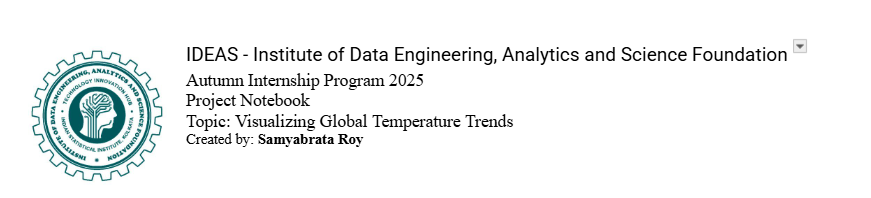

# Notebook: 3

👋 Welcome students!

In this journey, we’re going to take a dataset and slowly uncover the story it tells through visualization. Numbers by themselves can feel cold and endless, but once we turn them into visuals, they begin to speak.


---




---

## 📝 Before We Dive In...

Before we start digging deep into the dataset, let’s pause for a moment and reflect.  
Here are a couple of questions for you to think about (and maybe discuss!):

1. **What do you understand by *Time-Series Data*?**  
   *(Hint: Think about data that is recorded over time — like daily sales data.)*

2. **Do you think choosing Python as our programming language for this analysis is a good decision?**  
   Feel free to share your honest opinion — there’s no right or wrong answer here!  

---

# ANSWERS

1. Time-series data is a sequence of data points collected, recorded, or observed at successive points in time spaced at uniform intervals. It's data where the time dimension is crucial for understanding patterns, trends, and behaviors. Examples include stock prices, weather patterns, and, as the hint suggests, daily sales data.
2. In my opinion, yes, choosing Python for this analysis is a really good decision. Here's why:

**It's super popular:** Lots of people use Python for data analysis and visualization, so there are tons of resources, tutorials, and communities online if you get stuck or want to learn more.

**Powerful libraries**: Python has amazing libraries like Pandas for handling data and Matplotlib and Seaborn (and Plotly, which we used!) for creating visualizations. These make working with data much easier and faster.

**Versatile**: we can do so much with Python beyond just this analysis, like web development or building other applications, so the skills we learn are really transferable.

It's a language that's widely used in the data science world, and it's constantly being improved. So, we're definitely on the right track!

#Introduction



## ⚙️ Setting Things Up

Before we begin our analysis, we need to make sure we have the right tools.  
In the next coding cell, we’ll install and import the required Python packages that will help us explore and visualize the COVID-19 dataset.  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

---

## 📂 Loading Our Dataset

Now that our setup is ready, it’s time to bring in the data we’ll be working with.  
In the next coding cell, we’ll load the COVID-19 dataset directly from **Google Drive** (shared with public view access).  

Once the file is loaded, we’ll **print the first few rows** so that we can get a quick look at what the dataset contains before moving into analysis and visualization.  



In [ ]:
# Replace with your Google Drive file ID which has public view access
file_id = "1kRogzVjnT_2qcjLd0x8jHFmWsq1Ek9NB"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
    # Read CSV directly into pandas
    df_temp = pd.read_csv(url)
    print(df_temp.head())
except Exception as e:
    print("Error loading data:", e)


    Source        Date    Mean
0     GCAG  2016-12-06  0.7895
1  GISTEMP  2016-12-06  0.8100
2     GCAG  2016-11-06  0.7504
3  GISTEMP  2016-11-06  0.9300
4     GCAG  2016-10-06  0.7292


* To get more info about metadata of the dataset refer to README file in the root of this notebook directory

##Task:

What if the dataset was not available in any only repo or not hosted anywhere? How can you upload a dataset from your local machine? Code it

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# WE CAN UOPLOAD FILE FROM AVOVE CODE

Saving monthly_csv.csv to monthly_csv (3).csv
User uploaded file "monthly_csv (3).csv" with length 78893 bytes




---


## EDA including visualization

### Plot 1:

Monthly Revenue Over Time  

Visualizing monthly avg temparature obtaining from 2 different sources, which will help helps us understand trends across the years.  
Are there peaks during certain months (like due to any particular season)? Let’s find out.

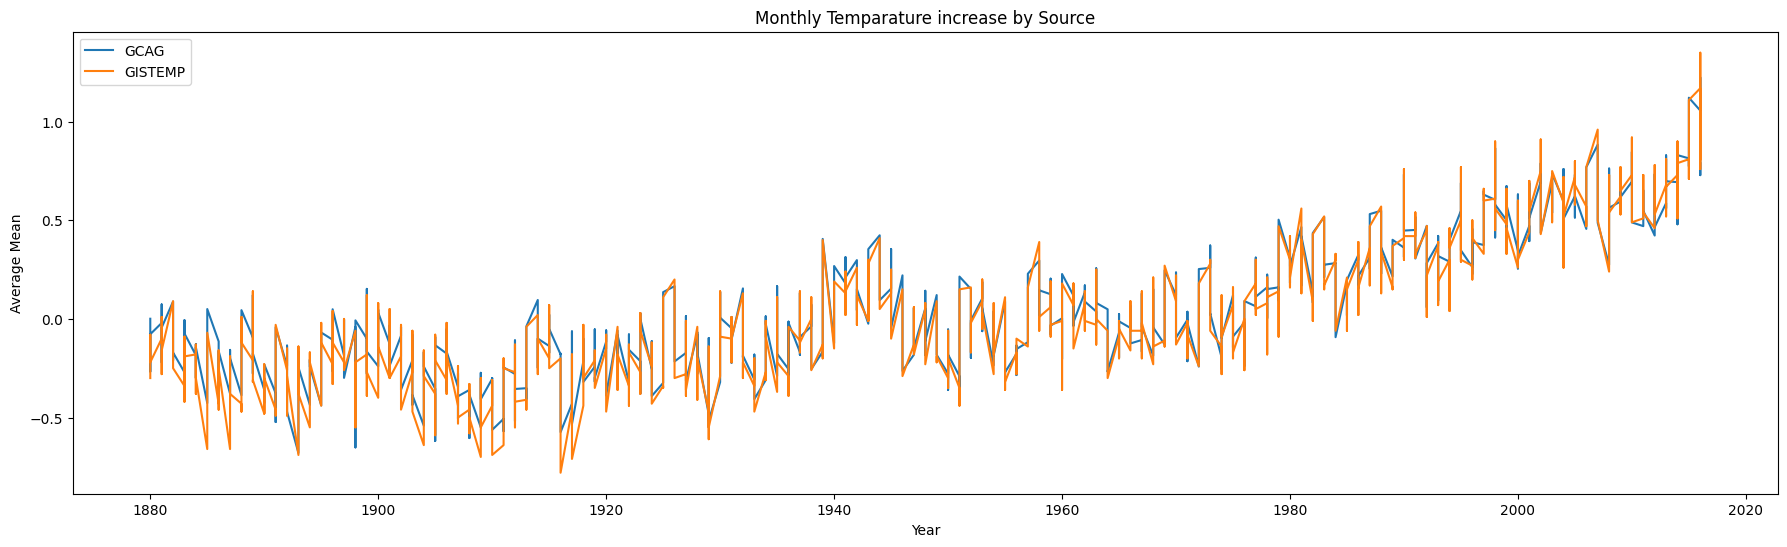

In [ ]:
import matplotlib.pyplot as plt

# Convert Date column to datetime
df_temp['Date'] = pd.to_datetime(df_temp['Date'])

# Extract Year from Date
df_temp['Year'] = df_temp['Date'].dt.year


# Plot line chart
plt.figure(figsize=(22,6))
for source in df_temp['Source'].unique():
    subset = df_temp[df_temp['Source'] == source]
    plt.plot(subset['Year'], subset['Mean'], label=source)

plt.title("Monthly Temparature increase by Source")
plt.xlabel("Year")
plt.ylabel("Average Mean")
plt.legend()
plt.grid(True, linestyle="--", alpha=0)
plt.show()



---



### Plot 2:

12 Months Moving Average

Smoothing out seasonal fluctuations and short-term variations to reveal the underlying long-term temperature trends. The 12-month moving average provides a clearer view of climate patterns by averaging each month with the 11 months surrounding it, making it easier to identify gradual warming or cooling trends over the years.

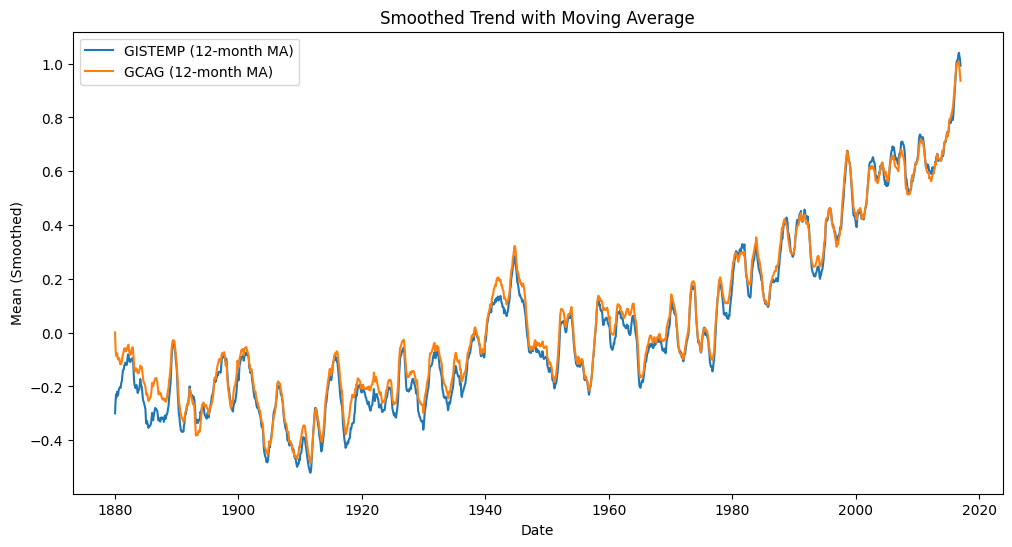

In [ ]:
# Sort data by Date
df_temp = df_temp.sort_values(by="Date")

# Calculate moving average (e.g., 12-month window)
df_temp['Moving_Avg'] = df_temp.groupby('Source')['Mean'].transform(lambda x: x.rolling(window=12, min_periods=1).mean())

# Plot moving average
plt.figure(figsize=(12,6))
for source in df_temp['Source'].unique():
    subset = df_temp[df_temp['Source'] == source]
    plt.plot(subset['Date'], subset['Moving_Avg'], label=f"{source} (12-month MA)")

plt.title("Smoothed Trend with Moving Average")
plt.xlabel("Date")
plt.ylabel("Mean (Smoothed)")
plt.legend()
plt.show()


Q. How would you interpet this?

Plot 1: Monthly Temperature by Source

Both sources (GISTEMP and GCAG) show almost identical patterns, meaning the datasets are reliable and consistent.

Between 1880 and ~1940, temperature anomalies fluctuate around -0.5°C to 0.2°C, without a clear upward trend.

Between 1940 and 1970, the global temperature remains relatively stable, even showing slight cooling in some periods.

From 1970 onwards, there is a clear and steep upward trend, with anomalies rising above +1.0°C by 2020.

conclusion: The Earth’s temperature has remained relatively stable for ~90

years, but since the 1970s, it has increased rapidly.


---

Plot 2: Smoothed 12-Month Moving Average

By smoothing, short-term fluctuations (seasonal/annual noise) are reduced, making long-term patterns more visible.

The long-term view shows:

Flat trend before ~1940.

Slight decline or plateau around mid-20th century.

Sharp warming trend after 1970, which continues steadily to present day.


Both sources again agree, giving confidence in the trend.

conculsion: When removing noise, the underlying climate trend clearly shows accelerating warming.



---

Overall Interpretation

The Earth’s climate was relatively stable until mid-20th century.

Since ~1970, temperatures have increased sharply and consistently.

The warming rate is unprecedented in the past 140 years, showing strong evidence of anthropogenic (human-driven) climate change.

Both datasets confirm the same story: global warming is real and accelerating.



---

Construct another line plot by taking any one of the souces in count and try to smooth-out the variation more and try to come up with a trend

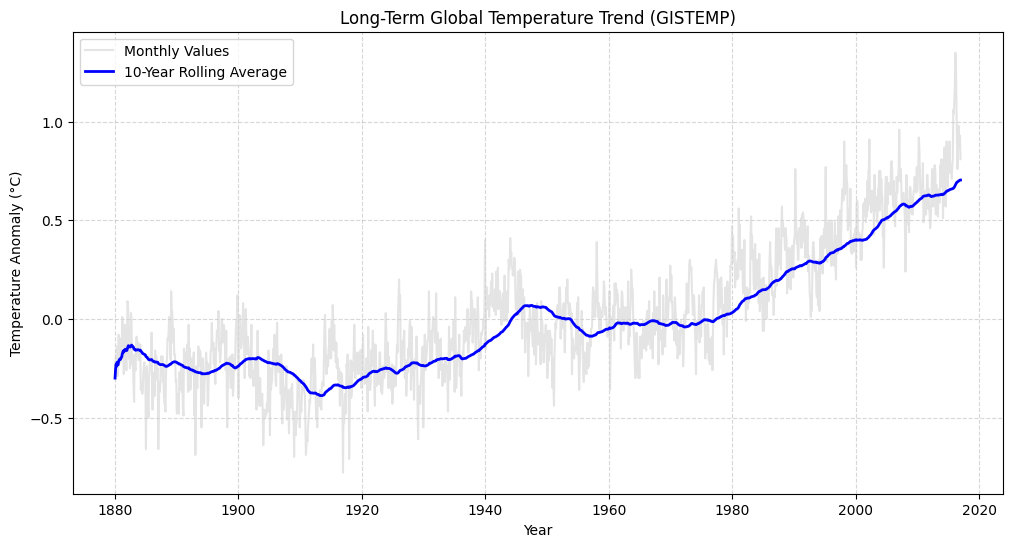

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataframe if it's not already loaded
# Replace with your Google Drive file ID which has public view access
file_id = "1kRogzVjnT_2qcjLd0x8jHFmWsq1Ek9NB"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
    # Read CSV directly into pandas
    df_temp = pd.read_csv(url)
except Exception as e:
    print("Error loading data:", e)

# Convert Date column to datetime
df_temp['Date'] = pd.to_datetime(df_temp['Date'])

# Sort data by Date
df_temp = df_temp.sort_values(by="Date")

# Filter only GISTEMP source
gistemp = df_temp[df_temp['Source'] == 'GISTEMP'].copy() # Use .copy() to avoid SettingWithCopyWarning

# Apply stronger smoothing (e.g., 120 months = 10 years rolling average)
gistemp['Smoothed'] = gistemp['Mean'].rolling(window=120, min_periods=1).mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(gistemp['Date'], gistemp['Mean'], color='lightgray', alpha=0.6, label='Monthly Values')
plt.plot(gistemp['Date'], gistemp['Smoothed'], color='blue', linewidth=2, label='10-Year Rolling Average')

plt.title("Long-Term Global Temperature Trend (GISTEMP)")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()




---


### Plot 3

Seasonal Temperature Heatmap (Last 50 Years)

A comprehensive heatmap displaying temperature variations across months and years over the past five decades. This visualization reveals seasonal patterns, climate shifts, and anomalies by showing how temperatures have changed month-by-month across different years. Warmer periods appear as lighter/warmer colors while cooler periods show as darker/cooler colors, making it easy to spot seasonal consistency, unusual weather events, and long-term climate trends.

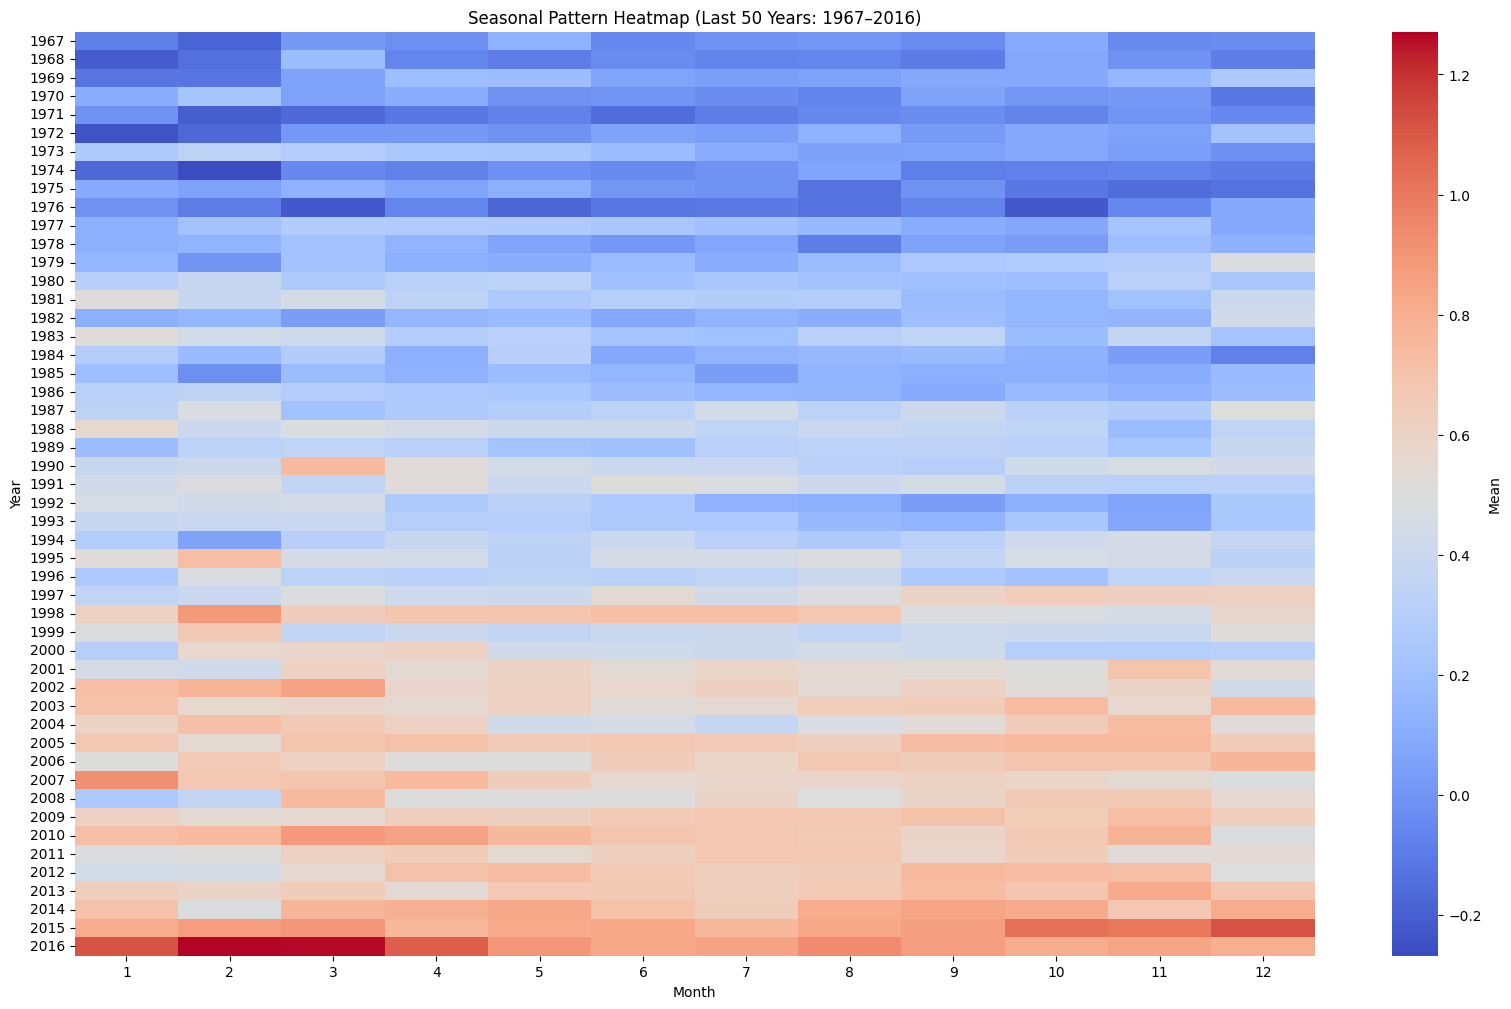

In [ ]:
# Extract Year and Month
df_temp['Year'] = df_temp['Date'].dt.year
df_temp['Month'] = df_temp['Date'].dt.month

# Filter last 50 years
latest_year = df_temp['Year'].max()
df_last50 = df_temp[df_temp['Year'] >= latest_year - 49]

# Group by Year and Month (average across sources if needed)
seasonal_data = df_last50.groupby(['Year','Month'])['Mean'].mean().reset_index()

# Pivot for heatmap
heatmap_data = seasonal_data.pivot(index='Year', columns='Month', values='Mean')

# Plot heatmap
plt.figure(figsize=(20,12))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, cbar_kws={'label': 'Mean'})
plt.title(f"Seasonal Pattern Heatmap (Last 50 Years: {latest_year-49}–{latest_year})")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


Q. How about we try to visualize last 20 years rather? Construct the plot

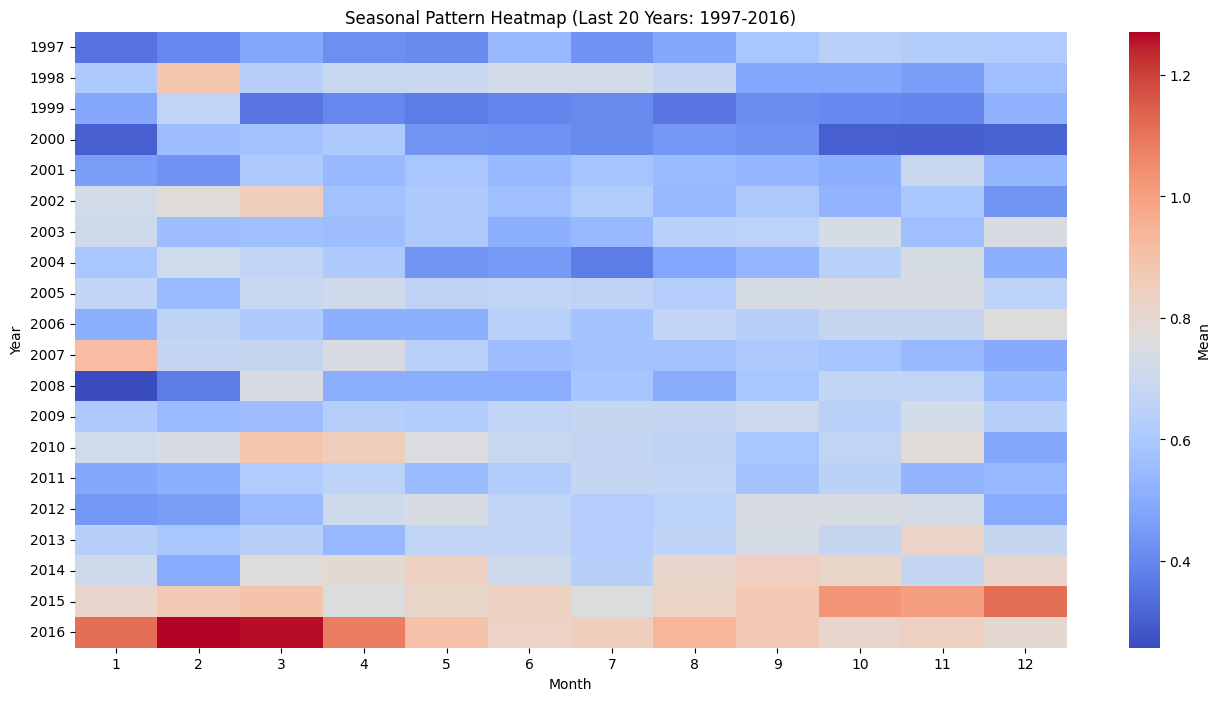

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # Import seaborn

# Extract Year and Month
df_temp['Year'] = df_temp['Date'].dt.year
df_temp['Month'] = df_temp['Date'].dt.month

# Filter last 20 years
latest_year = df_temp['Year'].max()
df_last20 = df_temp[df_temp['Year'] >= latest_year - 19]

# Group by Year and Month (take mean across sources if needed)
seasonal_data = df_last20.groupby(['Year', 'Month'])['Mean'].mean().reset_index()

# Pivot for heatmap
heatmap_data = seasonal_data.pivot(index='Year', columns='Month', values='Mean')

# Plot heatmap
plt.figure(figsize=(16,8))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, cbar_kws={'label': 'Mean'})
plt.title(f"Seasonal Pattern Heatmap (Last 20 Years: {latest_year-19}-{latest_year})")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()



---

Task:

What type of charts could have served the same purpose done in plot 3? Plot any one of them (apart from heatmap) and visualize seasonal variation

---
DIFFERENT CHARTS ARE:-
1. Line Plot (Multiple Lines for Months/Years)

Show temperature trends for each month across years.

Easy to compare January vs July trends.



2. Box Plot

Distribution of temperatures grouped by month.

Shows median, quartiles, and outliers → good for seasonal spread.



3. Violin Plot

Similar to box plot but shows density (shape of distribution).

Helps see skewness and variation in seasonal data.



4. Stacked Area Plot

Displays seasonal cycles stacked year by year.

Good for cumulative or comparative view.



5. Polar Plot (Circular Seasonal Cycle)

Months arranged in a circle → natural for seasonality.

Highlights repeating yearly cycles.



6. Bar Plot (Grouped by Month and Year)

Bars for each month across years.

Simple, works well for short time spans.



7. Small Multiples (Faceted Line Plots)

Each month gets a mini-plot across years.

Good for side-by-side seasonal comparison.





---

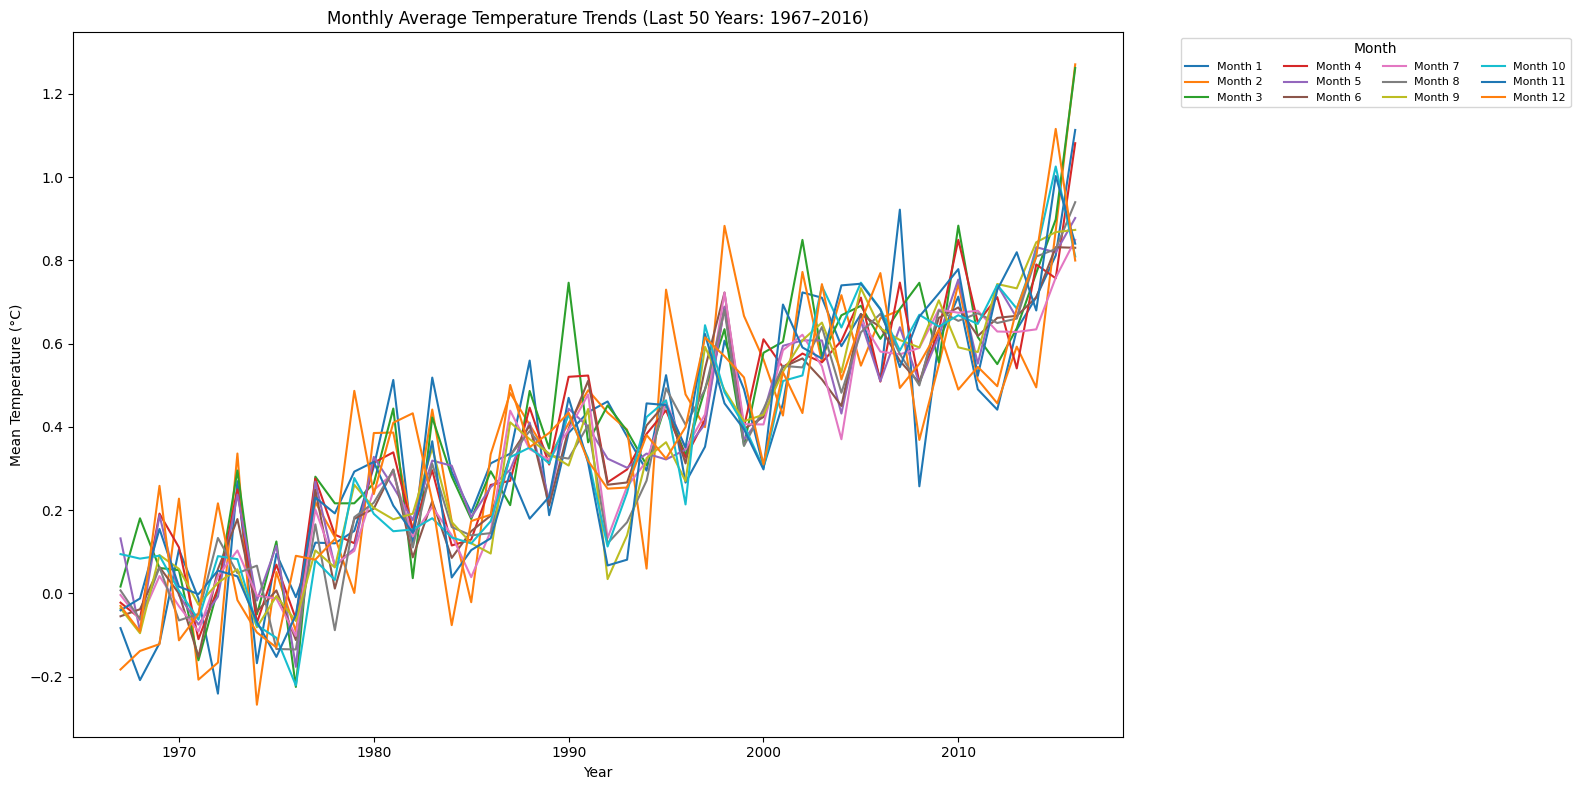

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Extract Year and Month ---
df_temp['Year'] = df_temp['Date'].dt.year
df_temp['Month'] = df_temp['Date'].dt.month

# --- Filter last 50 years ---
latest_year = df_temp['Year'].max()
df_last50 = df_temp[df_temp['Year'] >= latest_year - 49]

# --- Group and average ---
monthly_mean = df_last50.groupby(['Year', 'Month'])['Mean'].mean().reset_index()

# --- Plot ---
plt.figure(figsize=(16,8))
for m in range(1, 13):
    subset = monthly_mean[monthly_mean['Month'] == m]
    plt.plot(subset['Year'], subset['Mean'], label=f"Month {m}")

plt.title(f"Monthly Average Temperature Trends (Last 50 Years: {latest_year-49}–{latest_year})")
plt.xlabel("Year")
plt.ylabel("Mean Temperature (°C)")
plt.legend(title="Month", ncol=4, fontsize=8, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




---



### Assignment:

Find a similar dataset from any public repository or constrt a synthetic data from `www.syngendata.ai` and perform similart analysis to draw inference

---

# CARS SALES DATA OF DIFFERENT REGION OVER 10 YEARS

---

Saving car_sales_10_years_africa (1).csv to car_sales_10_years_africa (1) (7).csv
Data Loaded ✅
   Year Company  Units_Sold         Region
0  2022     Kia      387425  North America
1  2018     BMW      192898  South America
2  2016     Kia      390713  North America
3  2018   Honda      387784  North America
4  2019    Ford      103164         Africa
CAR SALES DATA ANALYSIS
Dataset shape: (50, 4)
Years covered: 2015 to 2024
Companies: Kia, BMW, Honda, Ford, Tesla, Toyota, Hyundai, Tata
Regions: North America, South America, Africa, Europe, Asia


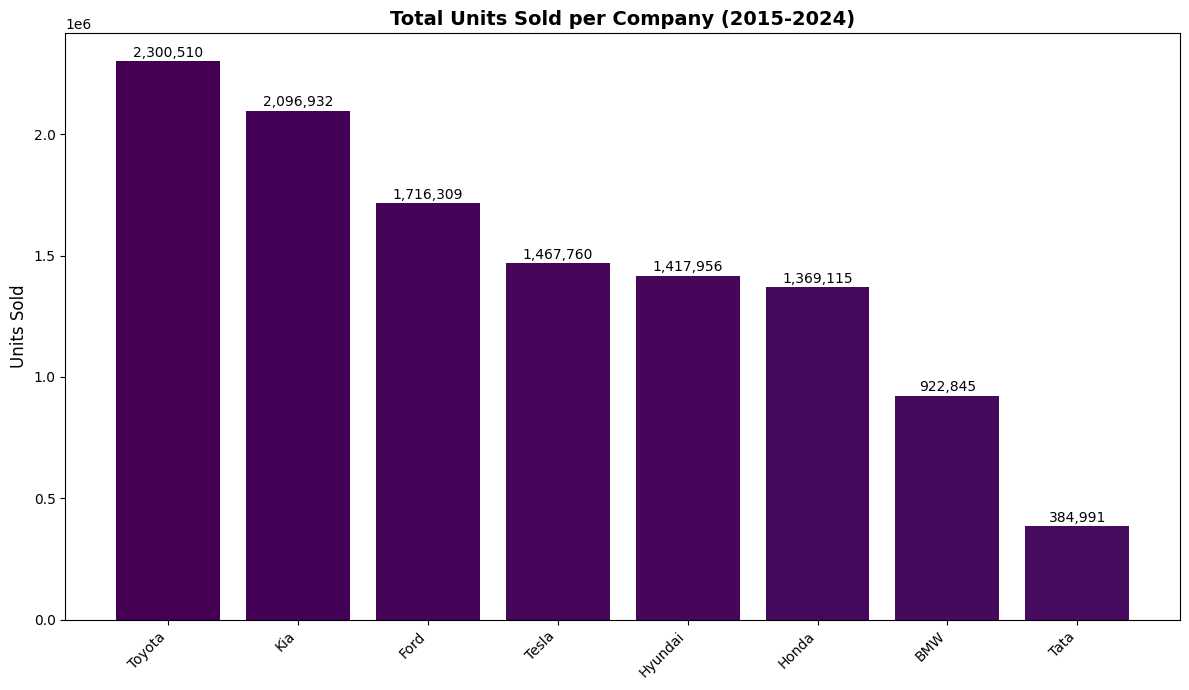


COMPANY SALES SUMMARY (HIGHEST TO LOWEST)
1. Toyota: 2,300,510 units
2. Kia: 2,096,932 units
3. Ford: 1,716,309 units
4. Tesla: 1,467,760 units
5. Hyundai: 1,417,956 units
6. Honda: 1,369,115 units
7. BMW: 922,845 units
8. Tata: 384,991 units



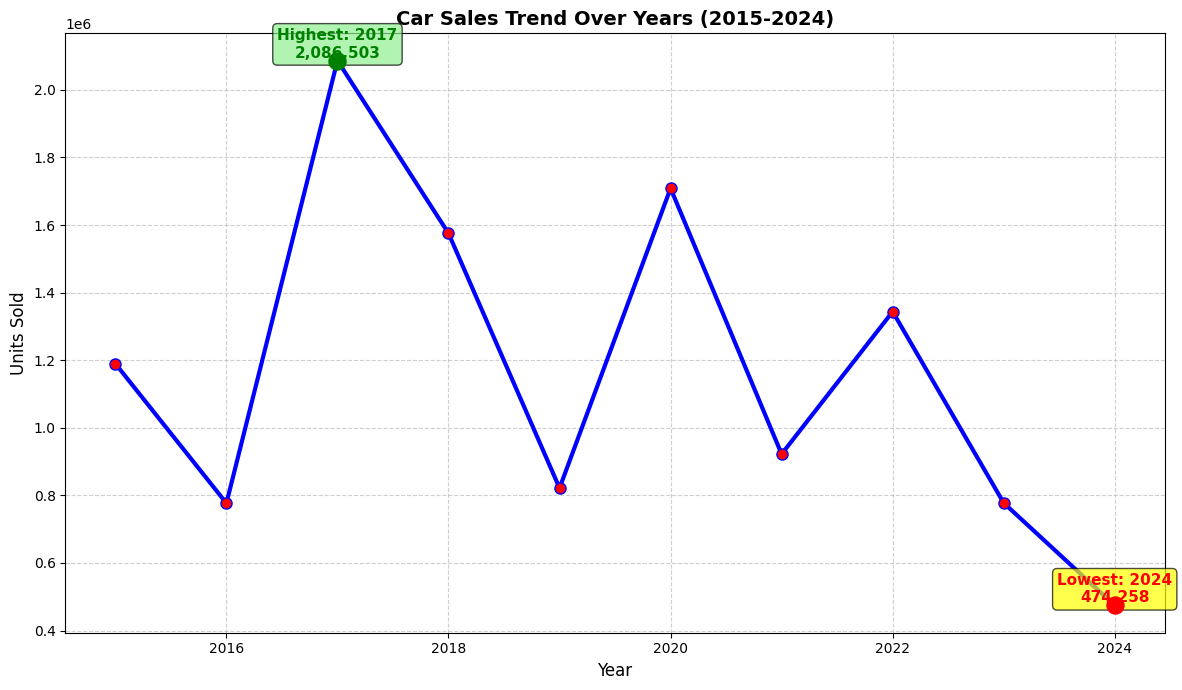


YEARLY SALES SUMMARY
2015: 1,189,747 units
2016: 776,848 units
2017: 2,086,503 units
2018: 1,575,447 units
2019: 821,553 units
2020: 1,708,526 units
2021: 922,208 units
2022: 1,343,676 units
2023: 777,652 units
2024: 474,258 units

► Highest sales year: 2017 (2,086,503 units)
► Lowest sales year: 2024 (474,258 units)



<Figure size 1400x800 with 0 Axes>

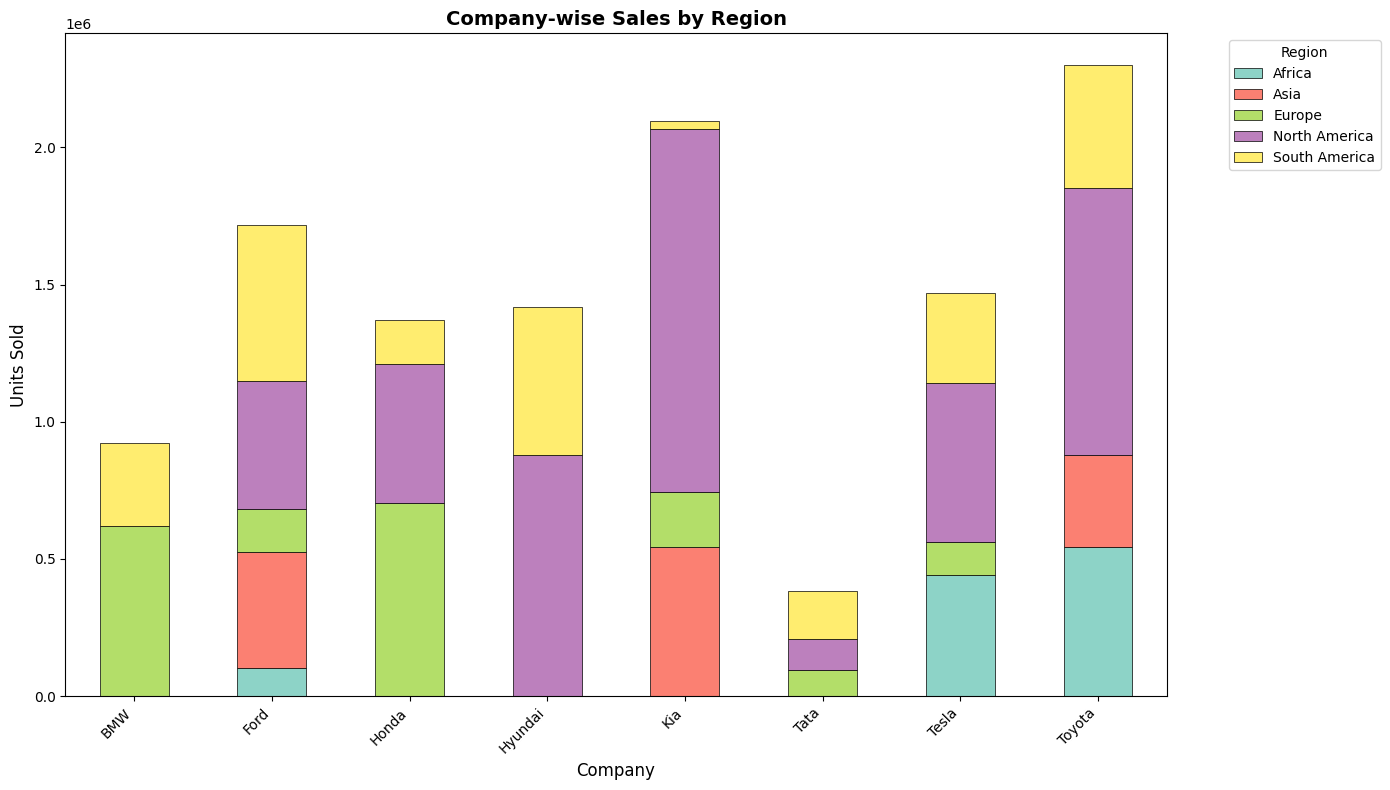

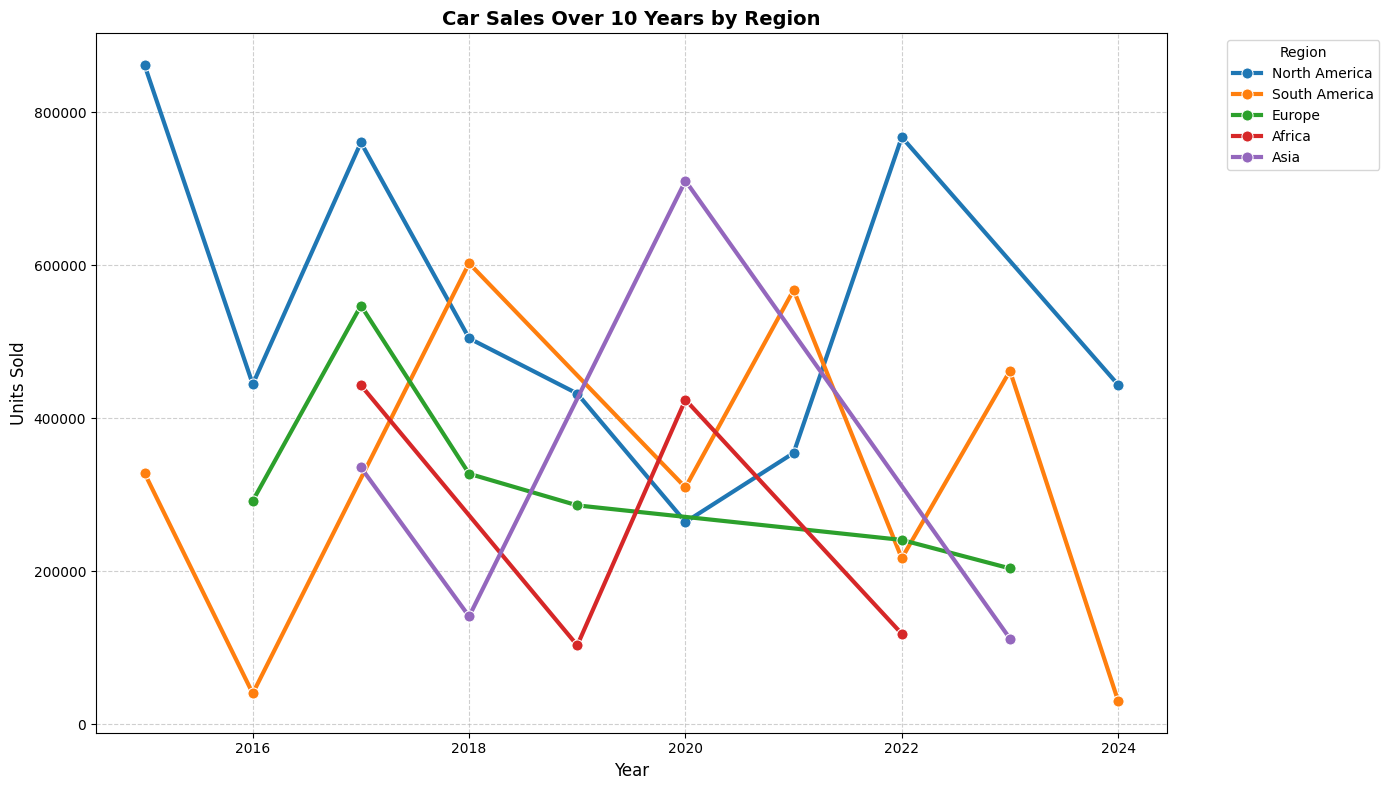


REGIONAL SALES SUMMARY
North America: 4,833,468 units
South America: 2,557,627 units
Europe: 1,897,587 units
Asia: 1,299,016 units
Africa: 1,088,720 units

ADDITIONAL INSIGHTS
Total cars sold (2015-2024): 11,676,418 units
Average yearly sales: 1,167,642 units
Number of sales records: 50
Most active region: North America (4,833,468 units)
Top company: Toyota (2,300,510 units)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

# STEP 1: Upload file
from google.colab import files  # use this if running in Google Colab
uploaded = files.upload()

# STEP 2: Read uploaded file
filename = list(uploaded.keys())[0]
if filename.endswith(".csv"):
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
elif filename.endswith((".xls", ".xlsx")):
    df = pd.read_excel(io.BytesIO(uploaded[filename]))
else:
    raise ValueError("Please upload CSV or Excel file")

print("Data Loaded ✅")
print(df.head())


# Display basic info about the dataset
print("="*60)
print("CAR SALES DATA ANALYSIS")
print("="*60)
print(f"Dataset shape: {df.shape}")
print(f"Years covered: {df['Year'].min()} to {df['Year'].max()}")
print(f"Companies: {', '.join(df['Company'].unique())}")
print(f"Regions: {', '.join(df['Region'].unique())}")
print("="*60)

# 1. Bar Chart: Total units sold per company
plt.figure(figsize=(12, 7))
company_sales = df.groupby("Company")["Units_Sold"].sum().sort_values(ascending=False)

bars = plt.bar(company_sales.index, company_sales.values, color=plt.cm.viridis(range(len(company_sales))))
plt.title("Total Units Sold per Company (2015-2024)", fontsize=14, fontweight='bold')
plt.ylabel("Units Sold", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5000,
            f'{height:,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Display company sales summary
print("\n" + "="*50)
print("COMPANY SALES SUMMARY (HIGHEST TO LOWEST)")
print("="*50)
for i, (company, sales) in enumerate(company_sales.items(), 1):
    print(f"{i}. {company}: {sales:,} units")
print()
# 2. Line Chart: Sales trend over years
plt.figure(figsize=(12, 7))
yearly_sales = df.groupby("Year")["Units_Sold"].sum().sort_index()

# Find lowest and highest year
lowest_year = yearly_sales.idxmin()
lowest_value = yearly_sales.min()
highest_year = yearly_sales.idxmax()
highest_value = yearly_sales.max()

plt.plot(yearly_sales.index, yearly_sales.values, marker='o', linewidth=3,
         markersize=8, color='blue', markerfacecolor='red')
plt.title("Car Sales Trend Over Years (2015-2024)", fontsize=14, fontweight='bold')
plt.ylabel("Units Sold", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# Annotate lowest and highest years
plt.scatter(lowest_year, lowest_value, color="red", s=150, zorder=5)
plt.text(lowest_year, lowest_value, f"Lowest: {lowest_year}\n{lowest_value:,}",
         ha="center", va="bottom", color="red", fontsize=11, fontweight="bold",
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.scatter(highest_year, highest_value, color="green", s=150, zorder=5)
plt.text(highest_year, highest_value, f"Highest: {highest_year}\n{highest_value:,}",
         ha="center", va="bottom", color="green", fontsize=11, fontweight="bold",
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))

plt.tight_layout()
plt.show()

# Yearly sales summary
print("\n" + "="*50)
print("YEARLY SALES SUMMARY")
print("="*50)
for year, sales in yearly_sales.items():
    print(f"{year}: {sales:,} units")

print(f"\n► Highest sales year: {highest_year} ({highest_value:,} units)")
print(f"► Lowest sales year: {lowest_year} ({lowest_value:,} units)")
print()
# 3. Stacked Bar Chart: Company vs Region
plt.figure(figsize=(14, 8))
stacked_data = df.groupby(["Company", "Region"])["Units_Sold"].sum().unstack().fillna(0)

ax = stacked_data.plot(kind="bar", stacked=True, figsize=(14, 8),
                      colormap="Set3", edgecolor='black', linewidth=0.5)
plt.title("Company-wise Sales by Region", fontsize=14, fontweight='bold')
plt.ylabel("Units Sold", fontsize=12)
plt.xlabel("Company", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Place legend outside the chart
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
plt.tight_layout()
plt.show()
print()
# 4. Line Chart: Region-wise sales trend over years
plt.figure(figsize=(14, 8))
region_trend = df.groupby(["Year", "Region"])["Units_Sold"].sum().reset_index()

sns.lineplot(data=region_trend, x="Year", y="Units_Sold", hue="Region",
             marker="o", linewidth=3, markersize=8, palette="tab10")
plt.title("Car Sales Over 10 Years by Region", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Units Sold", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)

plt.tight_layout()
plt.show()

# Regional analysis summary
print("\n" + "="*50)
print("REGIONAL SALES SUMMARY")
print("="*50)
region_sales = df.groupby("Region")["Units_Sold"].sum().sort_values(ascending=False)
for region, sales in region_sales.items():
    print(f"{region}: {sales:,} units")

# Additional insights
print("\n" + "="*50)
print("ADDITIONAL INSIGHTS")
print("="*50)
print(f"Total cars sold (2015-2024): {df['Units_Sold'].sum():,} units")
print(f"Average yearly sales: {yearly_sales.mean():,.0f} units")
print(f"Number of sales records: {len(df)}")
print(f"Most active region: {region_sales.idxmax()} ({region_sales.max():,} units)")
print(f"Top company: {company_sales.idxmax()} ({company_sales.max():,} units)")